## Problem Statement
### This project aims to cluster the customers into different groups and address their purchasing/spending behaviour based on their annual income.

### Importing dependencies or libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Clustering Algo
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Exploratory Data Analysis

In [3]:
customer_df = pd.read_csv('Mall_Customers.csv')
# Head of the dataframe
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Looking for shape of dataframe
customer_df.shape

(200, 5)

In [5]:
# Complete information of the dataframe
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Statistics of the dataframe
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Check for null values if any
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Removing white spaces and remaining columns
customer_df.columns=customer_df.columns.str.replace(" ","")
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

In [9]:
# renaming columns
customer_df.columns=customer_df.rename(columns={'AnnualIncome(k$)':'AnnualIncome',
                                  'SpendingScore(1-100)':'SpendingScore'}).columns
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

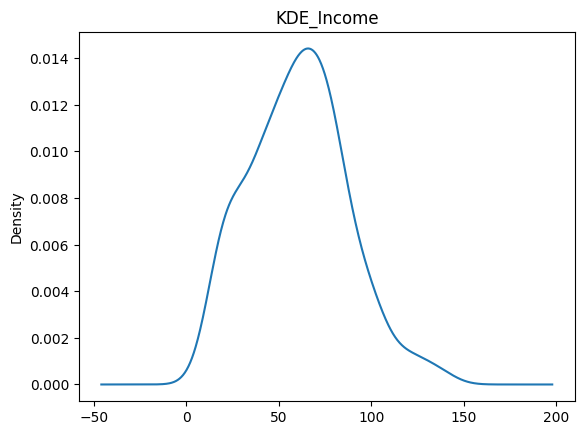

In [10]:
# KDE plot for Annual income
customer_df.AnnualIncome.plot(kind="kde")
plt.title('KDE_Income')
plt.show()

### Using AnnualIncome and SpendingScore columns

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

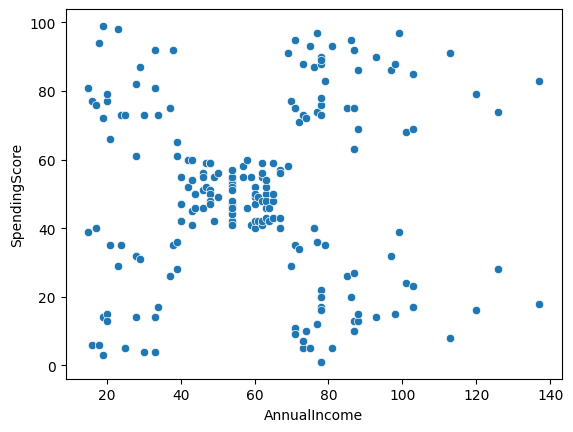

In [11]:
sns.scatterplot(data=customer_df.iloc[:,[3,4]],x="AnnualIncome",y="SpendingScore")

## K-Means Clustering Model

In [12]:
X = customer_df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Choosing number of clusters
#### wcss(Within Cluster Sum of Squares)

In [13]:
# Finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

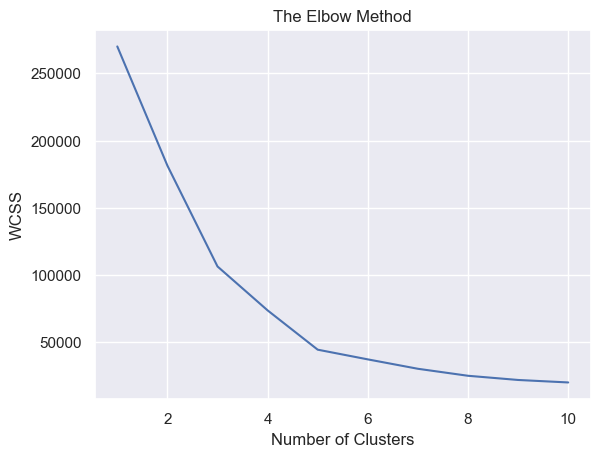

In [14]:
# Plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Training K-Means Clustering Model

##### Since there is an abrupt change in the X-axis between cluster 4 and cluster 6, this point is our point of interest, so the optimum number of clusters will be 5

In [15]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

# returning a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Validating Clustering Model

In [16]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, Y)
print('The average silhouette score is:', silhouette_avg)

The average silhouette score is: 0.553931997444648


- Since the score is towards +1, the cluster is a good cluster

### Visualizing all the clusters

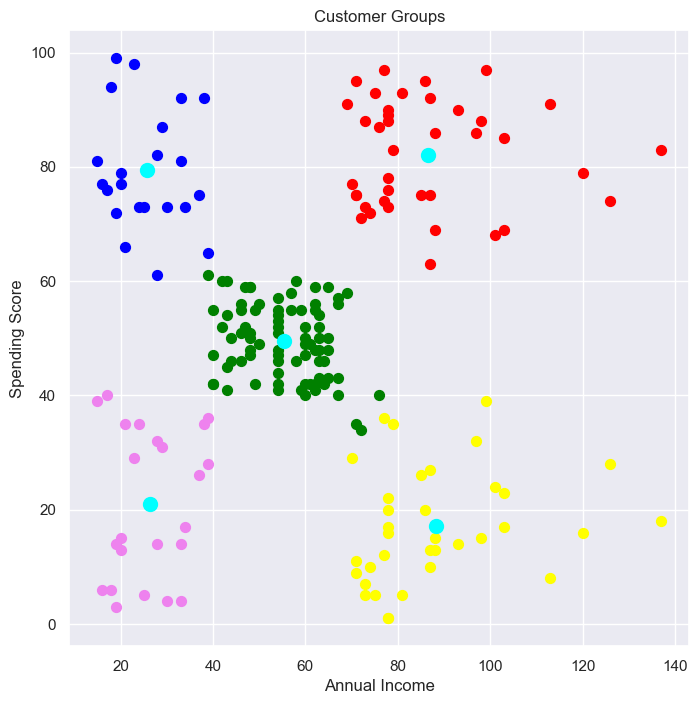

In [17]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Insights
- Cluster 1 shows average annual income with average annual income
- Cluster 2 shows customers having much higher annual income as well as higher spending score
- Cluster 3 says, geoup of customers having much higher annual income but less spending scores.
- Cluster 4 shows, group of customer having less annual income as well as less spending scores.
- Cluster 5 depicts,this group customers have less annual income but higher spending scores. 

Therefore, in order to enhance the sale, the mall should focus on customers within clusters 3 and 4 who are not buying much from the mall, the mall can give better discounts and offers to these customers through some membership cards, this will motivate these customers to buy more, which will directly increase the mall's profit and customer satisfaction

## Hirerchial Clustering Model

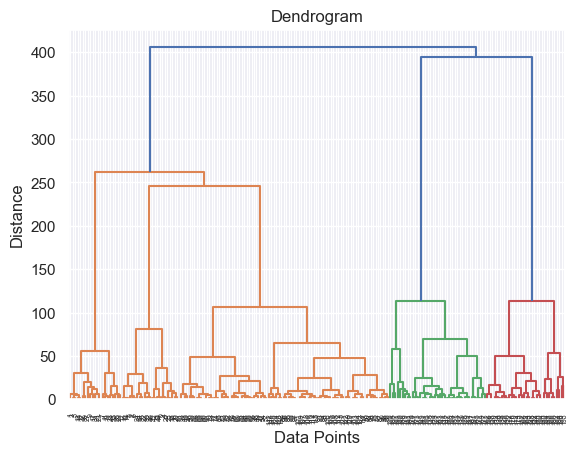

In [18]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Display the dendrogram
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

- From above we can identify that the clusters is equal to 5

### Validating Clustering Model

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='ward')
Y_cluster=cluster.fit_predict(X)

In [20]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, Y_cluster)
print('The average silhouette score is:', silhouette_avg)

The average silhouette score is: 0.5529945955148897


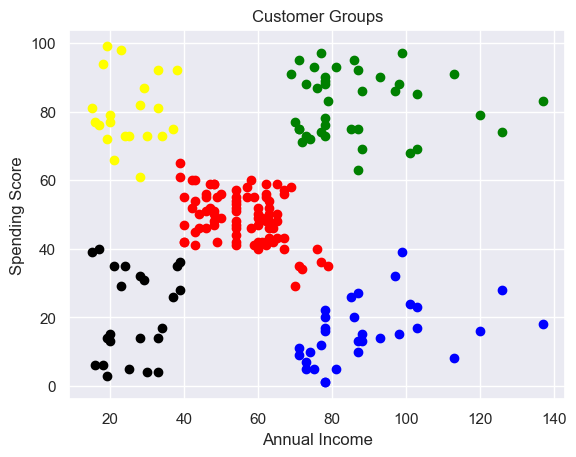

In [21]:
plt.scatter(X[Y_cluster == 0,0],X[Y_cluster == 0,1],color='blue')
plt.scatter(X[Y_cluster == 1,0],X[Y_cluster == 1,1],color='red')
plt.scatter(X[Y_cluster == 2,0],X[Y_cluster == 2,1],color='green')
plt.scatter(X[Y_cluster == 3,0],X[Y_cluster == 3,1],color='yellow')
plt.scatter(X[Y_cluster == 4,0],X[Y_cluster == 4,1],color='black')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [22]:
customer_df_hir = customer_df.copy()
customer_df_hir["Target"]=Y_cluster
customer_df_hir.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [23]:
X_hir=customer_df_hir.iloc[:,1:5]
y_hir=customer_df_hir.iloc[:,-1]

In [24]:
X_hir

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [25]:
y_hir

0      4
1      3
2      4
3      3
4      4
      ..
195    2
196    0
197    2
198    0
199    2
Name: Target, Length: 200, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [27]:
le=LabelEncoder()
X_hir['Gender'] = le.fit_transform(X_hir['Gender'])

In [28]:
X_hir

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_hir, y_hir, test_size=0.2, random_state=42)

In [30]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [32]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [33]:
gbdt.fit(X_train,y_train)
y_pred=gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

In [34]:
y_pred=gbdt.predict(X_test)
y_pred

array([1, 3, 4, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 4,
       0, 1, 1, 1, 1, 1, 2, 1, 3, 4, 1, 1, 0, 1, 2, 2, 0, 1], dtype=int64)

In [35]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred})

# Print the DataFrame
display(prediction)

,Original Value,Predicted Value
95,1,1
15,3,3
30,4,4
158,0,0
128,0,0
115,1,1
69,1,1
170,0,0
174,0,0
45,1,1


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0,  0,  0],
       [ 1, 19,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

Text(92.25, 0.5, 'Truth')

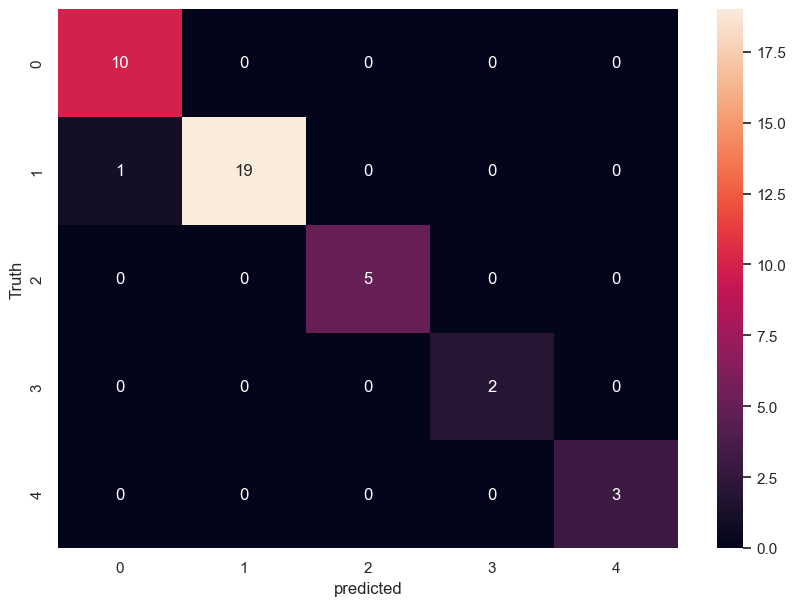

In [37]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

##### The gradientboosting classifier is able to predict the clusters correctly by 97.5%